<a href="https://colab.research.google.com/github/pifeldma/MAT-422/blob/main/HW3_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

3.7 Neural Networks

[[0.9995318]]  - Correct:  1
[[0.53073085]]  - Correct:  0


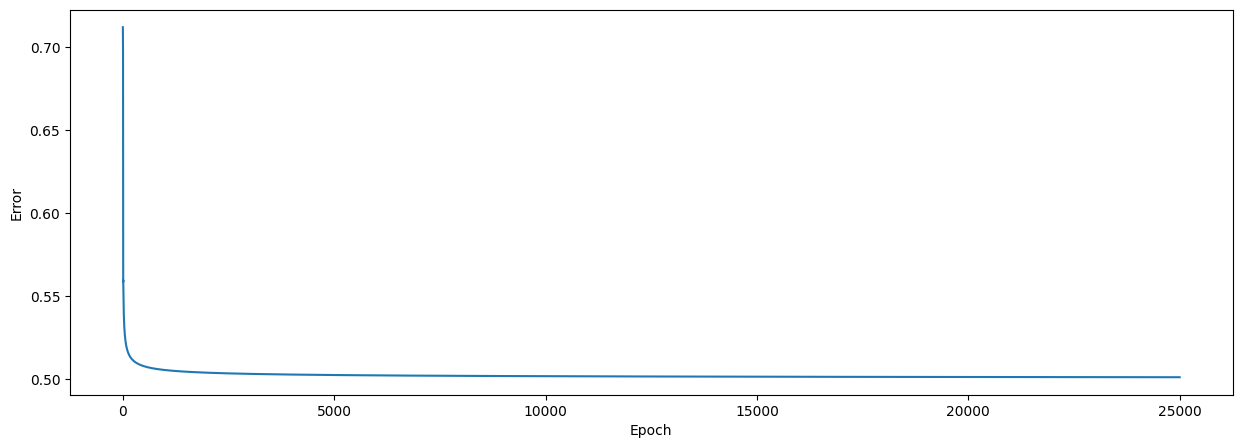

In [10]:
import numpy as np
import matplotlib.pyplot as plt

inputs = np.array([[0, 1, 7],
                   [1, 1, 1],
                   [1, 0, 1],
                   [1, 6, 1],
                   [1, 1, 1],
                   [1, 9, 1]])
outputs = np.array([[0], [0], [1], [1], [2], [2]])

class NeuralNetwork:

    def __init__(self, inputs, outputs):
        self.inputs  = inputs
        self.outputs = outputs
        self.weights = np.array([[.50], [.50], [.50]])
        self.error_history = []
        self.epoch_list = []

    def sigmoid(self, x, deriv=False):
        if deriv == True:
            return x * (1 - x)
        return 1 / (1 + np.exp(-x))

    def feed_forward(self):
        self.hidden = self.sigmoid(np.dot(self.inputs, self.weights))

    def backpropagation(self):
        self.error  = self.outputs - self.hidden
        delta = self.error * self.sigmoid(self.hidden, deriv=True)
        self.weights += np.dot(self.inputs.T, delta)

    def train(self, epochs=25000):
        for epoch in range(epochs):
            self.feed_forward()
            self.backpropagation()
            self.error_history.append(np.average(np.abs(self.error)))
            self.epoch_list.append(epoch)

    def predict(self, new_input):
        prediction = self.sigmoid(np.dot(new_input, self.weights))
        return prediction

NN = NeuralNetwork(inputs, outputs)
NN.train()

example = np.array([[1, 1, 0]])
example_2 = np.array([[0, 1, 1]])

print(NN.predict(example), ' - Correct: ', example[0][0])
print(NN.predict(example_2), ' - Correct: ', example_2[0][0])

plt.figure(figsize=(15,5))
plt.plot(NN.epoch_list, NN.error_history)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()